### Scatterplot -  relationship between two quantitative variables

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('fuel-econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

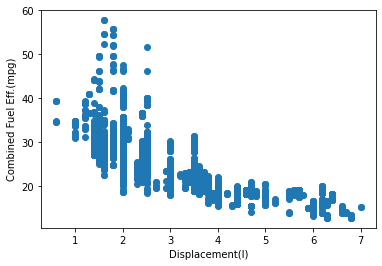

In [9]:
#scatterplot using matplotlib
plt.scatter(data=df, x='displ', y='comb')
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff.(mpg)');

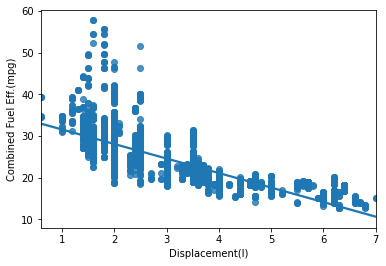

In [10]:
#scatterplot using seaborn. regplot fuction combines scatterplot creation with regression function fitting
#the regression line can be turned off by using fit_reg=False
sb.regplot(data=df, x='displ', y='comb')
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff.(mpg)');

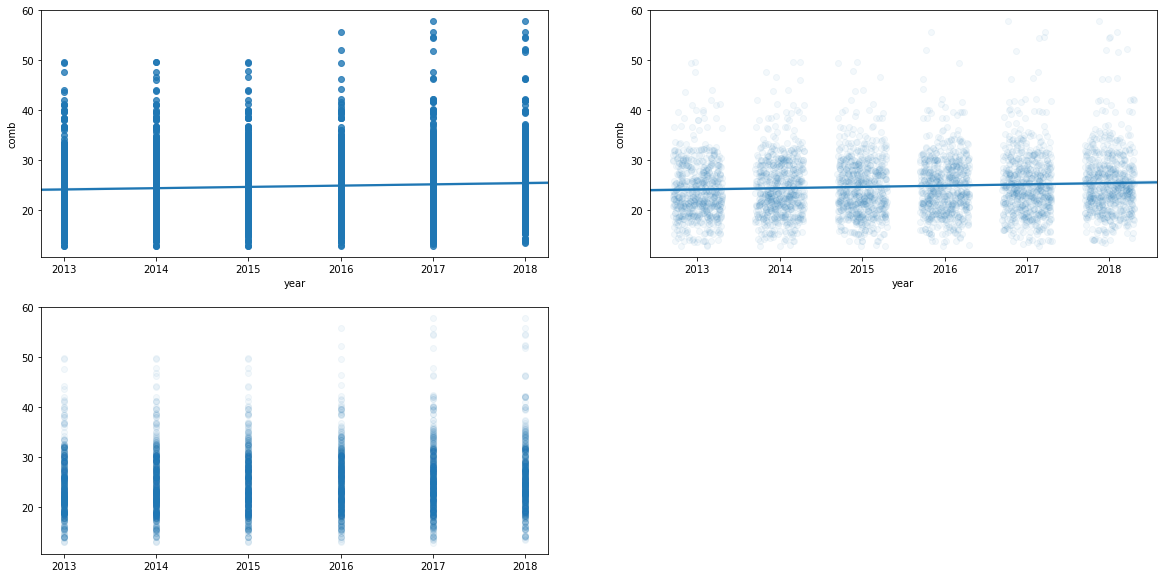

In [24]:
plt.figure(figsize=[20,10])
# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(2,2,1)
sb.regplot(data=df, x='year', y='comb',truncate=False);

#PLOT ON RIGHT - The x_jitter will make each x value will be adjusted randomly by +/-0.3
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque.
plt.subplot(2,2,2)
sb.regplot(data=df, x='year', y='comb',truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.subplot(2,2,3)
plt.scatter(data=df, x='year', y='comb', alpha=1/20);

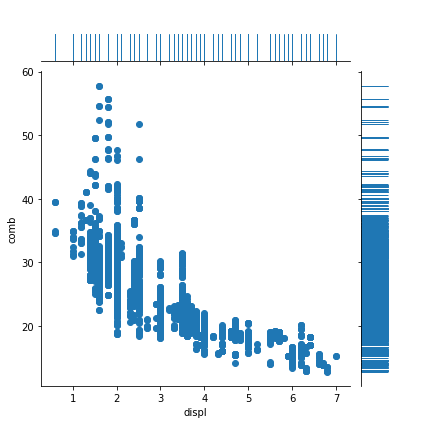

In [159]:
# Seaborn's JointGrid class enables plotting of bivariate relationship with marginal univariate plots for numeric data
g = sb.JointGrid(data=df, x='displ', y='comb')
g.plot_joint(plt.scatter)
g.plot_marginals(sb.rugplot, height=0.5);

### Heatmap -  relationship between two quantitative variables

In [32]:
df[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


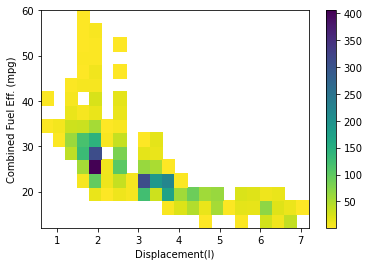

In [35]:
#color and density of data - heat map is like a 2D version of histogram
#heat map for quan vs qual good for discreate variable and bin sizes are import
bins_x=np.arange(0.6, 7+0.3, 0.3)
bins_y=np.arange(12,58+3,3)
plt.hist2d(data=df, x='displ', y='comb', cmin=0.5,
          cmap='viridis_r', bins=[bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Violin plot / box plot / swarm plot: quantitative variable vs qualitative variable 

For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distrubution is plotted as a kernel density estimate, something like a smoothed histogram.
- violin plot
- box plot
- swarm plot
- clustered bar chart or heat map for qualitative vs more than 1 quantitative

### Violin plot

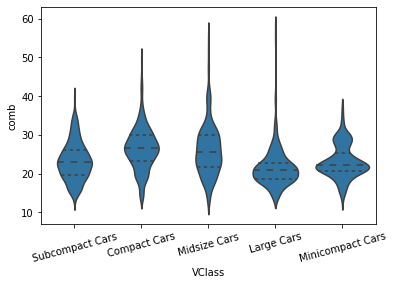

In [44]:
# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='VClass', y='comb', color=base_color, inner='quartile');
plt.xticks(rotation = 15);

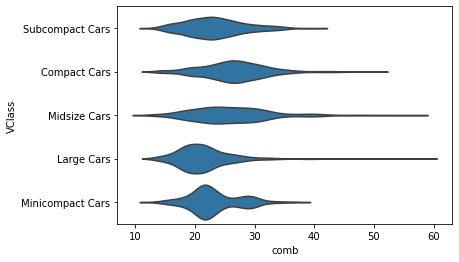

In [40]:
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='comb', y='VClass', color=base_color, inner=None);

### Box plot

C:\Users\zhteg\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zhteg\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zhteg\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zhteg\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zhteg\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.0% of the points

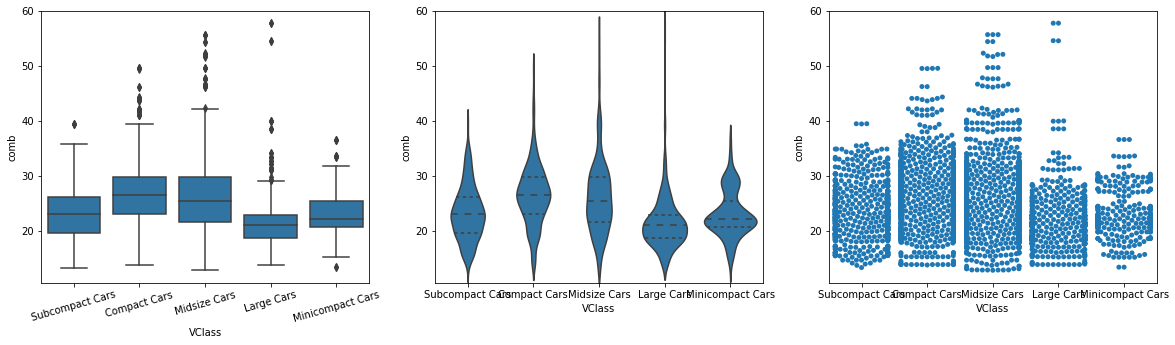

In [156]:
#the height of the box is the interquartile range (IQR);
#from the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the min or max value in the distribution
#typically a max range is set on whiker length by default of 1.5 times the IQR
plt.figure(figsize=[20,5])
base_color = sb.color_palette()[0]
# left plot: violin plot
plt.subplot(1,3,1)
ax1 = sb.boxplot(data=df, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=16);

# center plot: box plot
plt.subplot(1,3,2)
sb.violinplot(data=df, x='VClass', y='comb', color=base_color, inner='quartile');
plt.ylim(ax1.get_ylim()); 

# right plot: swarm plot
plt.subplot(1, 3, 3)
sb.swarmplot(data = df, x = 'VClass', y = 'comb', color = base_color)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

### Clustered bar charts for qualitative variable vs qualitative variable
relationship between 2 categorical variables

In [49]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [98]:
# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 
df['trans_type'] = df.trans.apply(lambda x: x.split()[0])

In [99]:
ct_counts = df.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Compact Cars      Automatic     784
                  Manual        338
Large Cars        Automatic     605
                  Manual         20
Midsize Cars      Automatic     989
                  Manual        199
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
dtype: int64

In [100]:
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Compact Cars,Automatic,784
1,Compact Cars,Manual,338
2,Large Cars,Automatic,605
3,Large Cars,Manual,20
4,Midsize Cars,Automatic,989
5,Midsize Cars,Manual,199
6,Minicompact Cars,Automatic,188
7,Minicompact Cars,Manual,133
8,Subcompact Cars,Automatic,502
9,Subcompact Cars,Manual,171


In [101]:
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type',values='count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Compact Cars,784,338
Large Cars,605,20
Midsize Cars,989,199
Minicompact Cars,188,133
Subcompact Cars,502,171


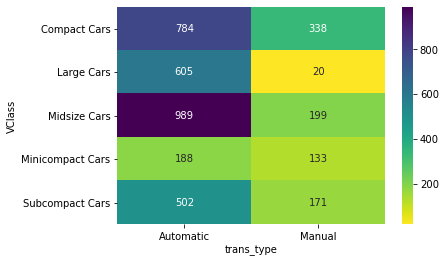

In [113]:
sb.heatmap(ct_counts, annot=True, fmt='0.0f', cmap='viridis_r');

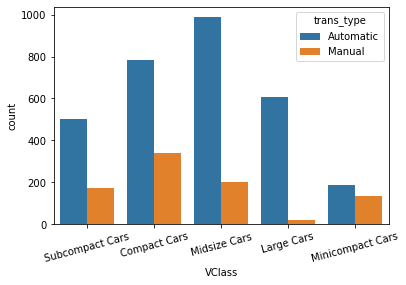

In [111]:
sb.countplot(data=df, x='VClass', hue='trans_type')
plt.xticks(rotation=15);

#### Faceting
One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

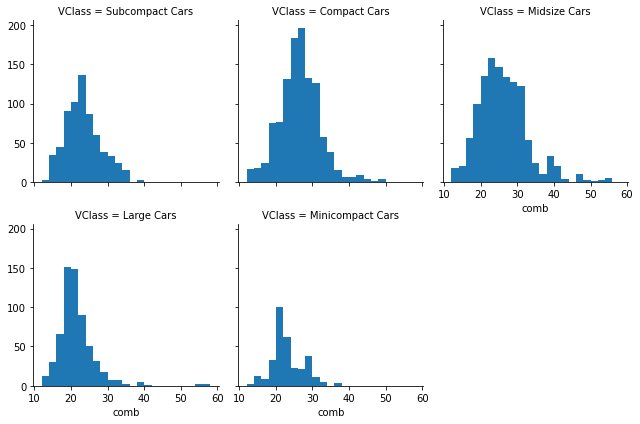

In [118]:
bins = np.arange(12, 58+2, 2)
g=sb.FacetGrid(data=df, col='VClass', col_wrap=3)
g.map(plt.hist, 'comb', bins=bins);

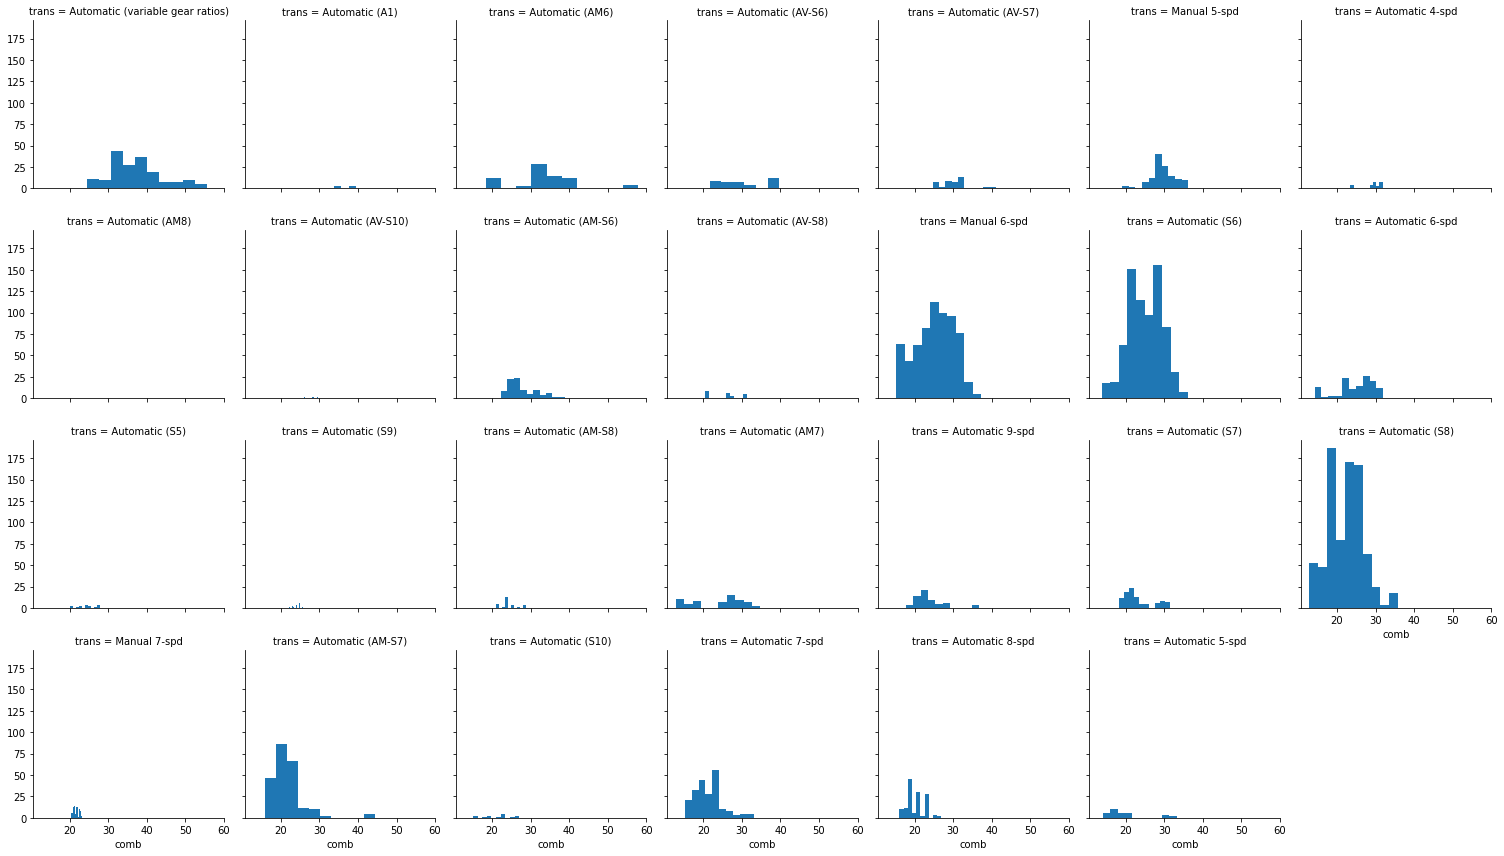

In [120]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = df[['trans', 'comb']].groupby(['trans']).mean()
group_means

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index
group_order

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = df, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')

C:\Users\zhteg\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


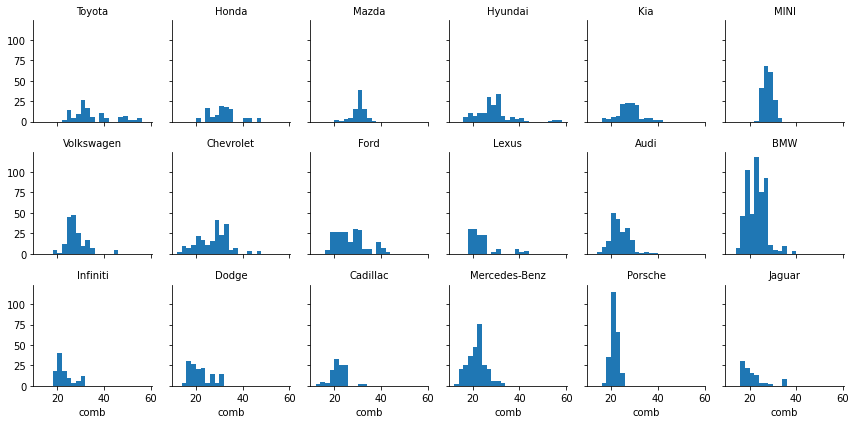

In [131]:
THRESHOLD = 80
make_frequency = df['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)

most_makes = make_frequency.index[:idx]
fuel_econ_sub = df.loc[df['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

# plotting
g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, size = 2,
                     col_order = comb_order)
# try sb.distplot instead of plt.hist to see the plot in terms of density!
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}')

#### Adapted Bar Charts
Histograms and bar charts were introduced as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's barplot function:

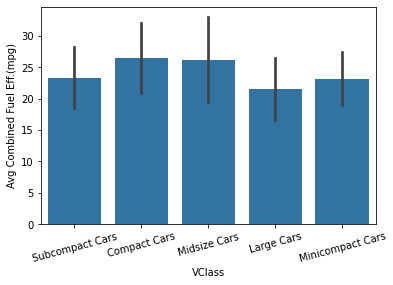

In [125]:
#adaptation of bar chart 
base_color = sb.color_palette()[0]
sb.barplot(data=df, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg Combined Fuel Eff.(mpg)');

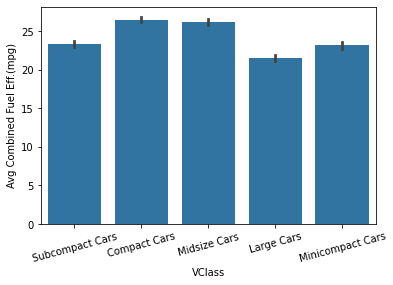

In [126]:
base_color = sb.color_palette()[0]
sb.barplot(data=df, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylabel('Avg Combined Fuel Eff.(mpg)');

#### Line Plots
The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

In [132]:
df.displ.describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

In [135]:
bin_edges = np.arange(0.6, 7+2, 0.2)
bin_edges

array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ,
       3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6,
       5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8, 8. , 8.2,
       8.4, 8.6, 8.8])

In [137]:
bin_centers = bin_edges[:-1] + 0.1
bin_centers

array([0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1,
       3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7,
       5.9, 6.1, 6.3, 6.5, 6.7, 6.9, 7.1, 7.3, 7.5, 7.7, 7.9, 8.1, 8.3,
       8.5, 8.7])

In [141]:
displ_binned = pd.cut(df.displ, bin_edges, include_lowest=True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (41, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (8.0, 8.2] < (8.2, 8.4] < (8.4, 8.6] < (8.6, 8.8]]

In [153]:
df['comb'].describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

In [148]:
comb_mean = df['comb'].groupby(displ_binned).mean()
comb_std = df['comb'].groupby(displ_binned).std()
comb_mean

displ
(0.599, 0.8]    37.057583
(0.8, 1.0]      33.469158
(1.0, 1.2]      35.838600
(1.2, 1.4]      31.964468
(1.4, 1.6]      30.489490
(1.6, 1.8]      31.996801
(1.8, 2.0]      27.534614
(2.0, 2.2]      31.790900
(2.2, 2.4]      26.888429
(2.4, 2.6]      28.589656
(2.6, 2.8]      20.227183
(2.8, 3.0]      22.464063
(3.0, 3.2]      22.638350
(3.2, 3.4]      21.962225
(3.4, 3.6]      22.602561
(3.6, 3.8]      20.616143
(3.8, 4.0]      18.977208
(4.0, 4.2]      18.320850
(4.2, 4.4]      18.160620
(4.4, 4.6]      18.668650
(4.6, 4.8]      18.661085
(4.8, 5.0]      18.054693
(5.0, 5.2]      16.481675
(5.2, 5.4]            NaN
(5.4, 5.6]      17.972043
(5.6, 5.8]      18.455833
(5.8, 6.0]      15.161788
(6.0, 6.2]      16.428960
(6.2, 6.4]      16.452696
(6.4, 6.6]      14.890232
(6.6, 6.8]      13.716614
(6.8, 7.0]      15.256400
(7.0, 7.2]            NaN
(7.2, 7.4]            NaN
(7.4, 7.6]            NaN
(7.6, 7.8]            NaN
(7.8, 8.0]            NaN
(8.0, 8.2]            NaN
(8.2, 

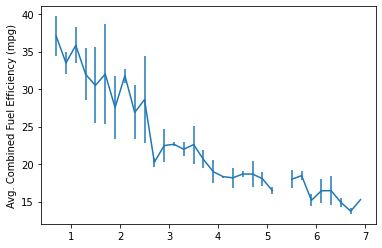

In [146]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = df['comb'].groupby(displ_binned).mean()
comb_std = df['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');